In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# **Clean dữ liệu**

In [ ]:

# Link share google drive của dữ liệu
link='https://drive.google.com/file/d/1XUem20cYhtrKAzI9Iy4yqJEPDBSzfv_t/view?usp=drive_link'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
data = pd.read_csv(path)

# Hiển thị thông tin tổng quan về dữ liệu
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB
None


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB
None


In [ ]:
print(data.describe())

        customer_id  credit_score           age        tenure       balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean   1.569094e+07    650.528800     38.921800      5.012800  6.980471e+06   
std    7.193619e+04     96.653299     10.487806      2.892174  6.285896e+06   
min    1.556570e+07    350.000000     18.000000      0.000000  0.000000e+00   
25%    1.562853e+07    584.000000     32.000000      3.000000  0.000000e+00   
50%    1.569074e+07    652.000000     37.000000      5.000000  8.668510e+06   
75%    1.575323e+07    718.000000     44.000000      7.000000  1.246215e+07   
max    1.581569e+07    850.000000     92.000000     10.000000  2.508981e+07   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      1.000000e+04   
mean          1.530200      0.70550       0.515100      9.089385e+06   
std           0.581654      0.45584       0.499797      6.128208e+06   


In [ ]:
# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data.shape


Missing Values:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


(10000, 12)

In [ ]:
# xử lý xem có dữ liệu trùng lặp
data.duplicated().sum()


0

In [ ]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
#drop cột customer_id vì không cần thiết
data.drop(["customer_id"], axis= 1, inplace= True)

In [ ]:

# Loại bỏ giá trị ngoại lai
# Detecting and handling outliers using Z-score
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")
data = data[~outliers]
print(f"Number of rows after removing outliers: {data.shape[0]}")



Number of outliers: 201
Number of rows after removing outliers: 9799


In [ ]:
#Convert Categorical Variables:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0}).astype(int)
data['country'] = data['country'].map({'France': 0, 'Spain': 1, 'Germany': 2}).astype(int)





### **Data visulization**

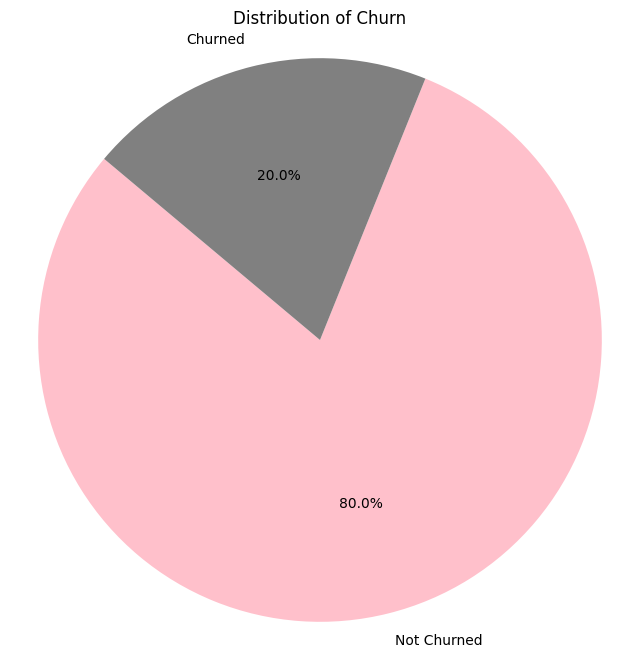

In [ ]:
# Calculate the number of churned and not churned customers
churn_counts = data['churn'].value_counts()

# Create labels and sizes for the pie chart
labels = ['Not Churned', 'Churned']
sizes = [churn_counts[0], churn_counts[1]]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['PINK','GRAY'])
plt.title('Distribution of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

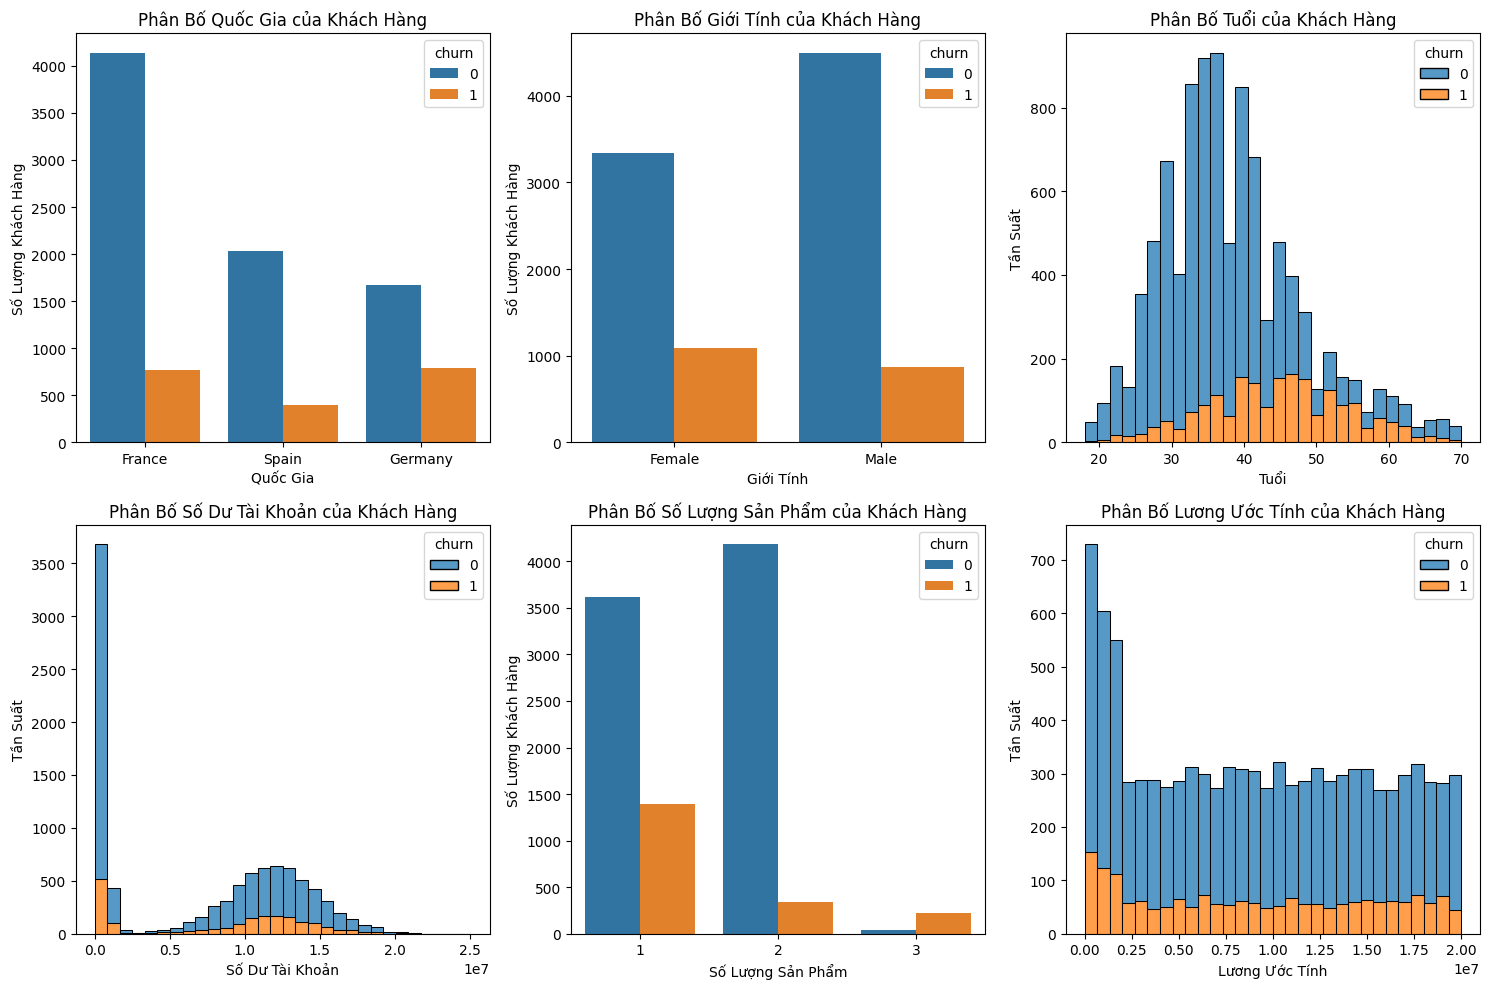

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(15, 10))

# Country Distribution with hue='churn'
plt.subplot(2, 3, 1)
sns.countplot(data=data, x='country', hue='churn')
plt.title('Phân Bố Quốc Gia của Khách Hàng')
plt.xlabel('Quốc Gia')
plt.ylabel('Số Lượng Khách Hàng')

# Gender Distribution with hue='churn'
plt.subplot(2, 3, 2)
sns.countplot(data=data, x='gender', hue='churn')
plt.title('Phân Bố Giới Tính của Khách Hàng')
plt.xlabel('Giới Tính')
plt.ylabel('Số Lượng Khách Hàng')

# Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=data, x='age', hue='churn', multiple='stack', bins=30)
plt.title('Phân Bố Tuổi của Khách Hàng')
plt.xlabel('Tuổi')
plt.ylabel('Tần Suất')

# Balance Distribution
plt.subplot(2, 3, 4)
sns.histplot(data=data, x='balance', hue='churn', multiple='stack', bins=30)
plt.title('Phân Bố Số Dư Tài Khoản của Khách Hàng')
plt.xlabel('Số Dư Tài Khoản')
plt.ylabel('Tần Suất')

# Number of Products Distribution with hue='churn'
plt.subplot(2, 3, 5)
sns.countplot(data=data, x='products_number', hue='churn')
plt.title('Phân Bố Số Lượng Sản Phẩm của Khách Hàng')
plt.xlabel('Số Lượng Sản Phẩm')
plt.ylabel('Số Lượng Khách Hàng')

# Estimated Salary Distribution
plt.subplot(2, 3, 6)
sns.histplot(data=data, x='estimated_salary', hue='churn', multiple='stack', bins=30)
plt.title('Phân Bố Lương Ước Tính của Khách Hàng')
plt.xlabel('Lương Ước Tính')
plt.ylabel('Tần Suất')

plt.tight_layout()
plt.show()


In [ ]:
# Create the pie chart for credit card ownership among churned customers
plt.figure(figsize=(9, 6))
pie_chart_credit_card(data, 'Phân Bố Sở Hữu Thẻ Tín Dụng của Khách Hàng Rời Bỏ')
plt.show()


KeyError: 'index'

<Figure size 900x600 with 0 Axes>

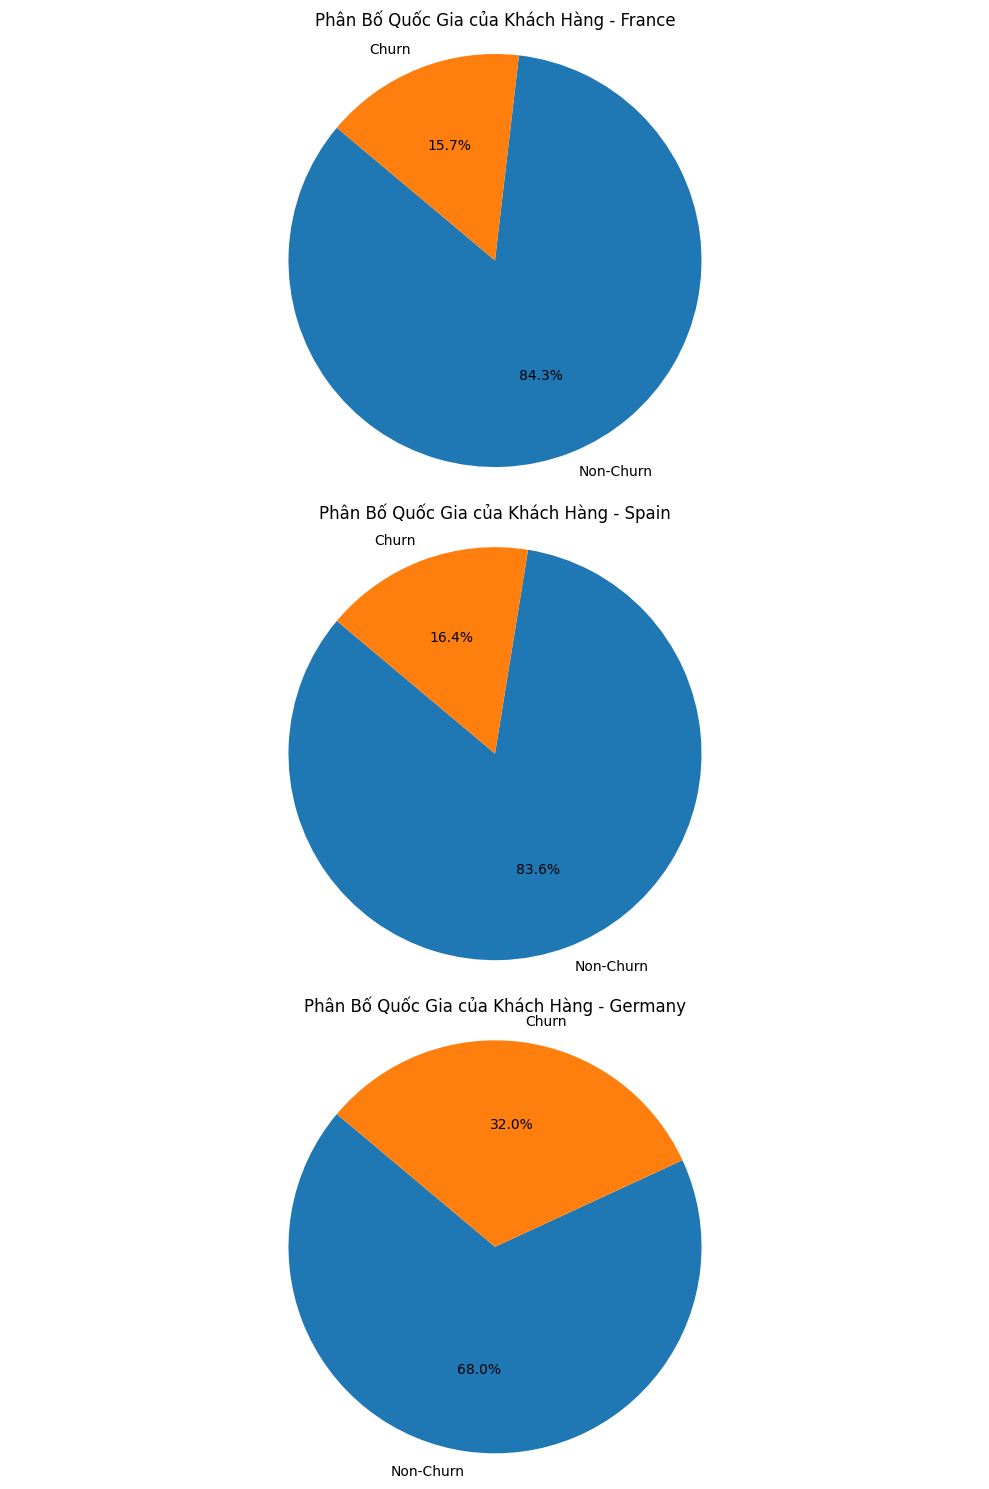

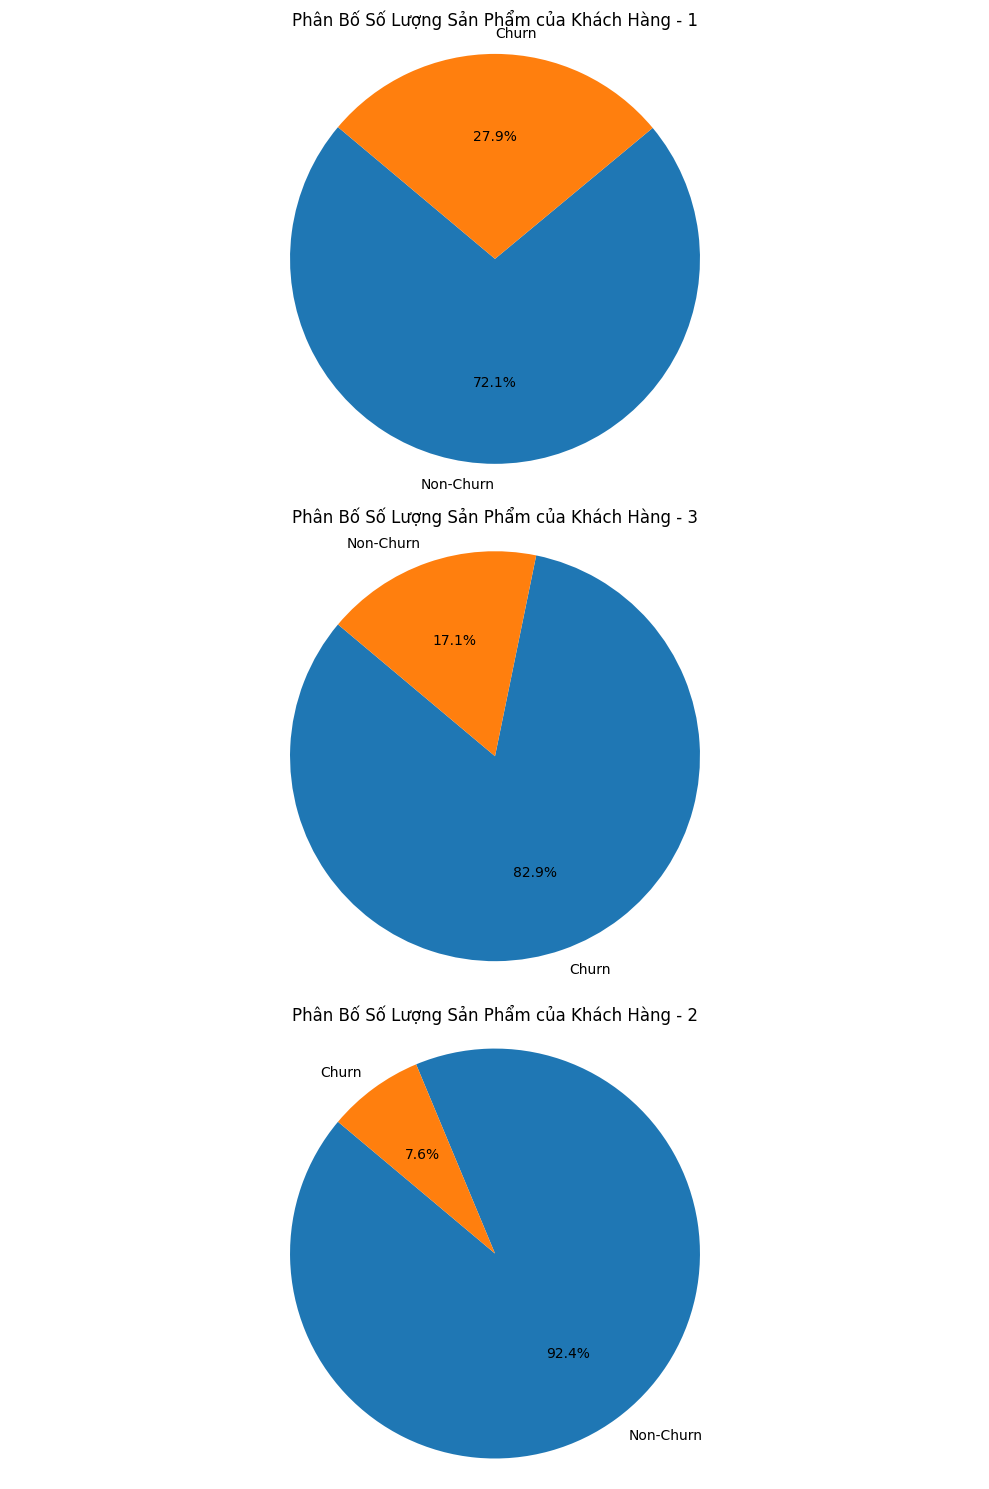

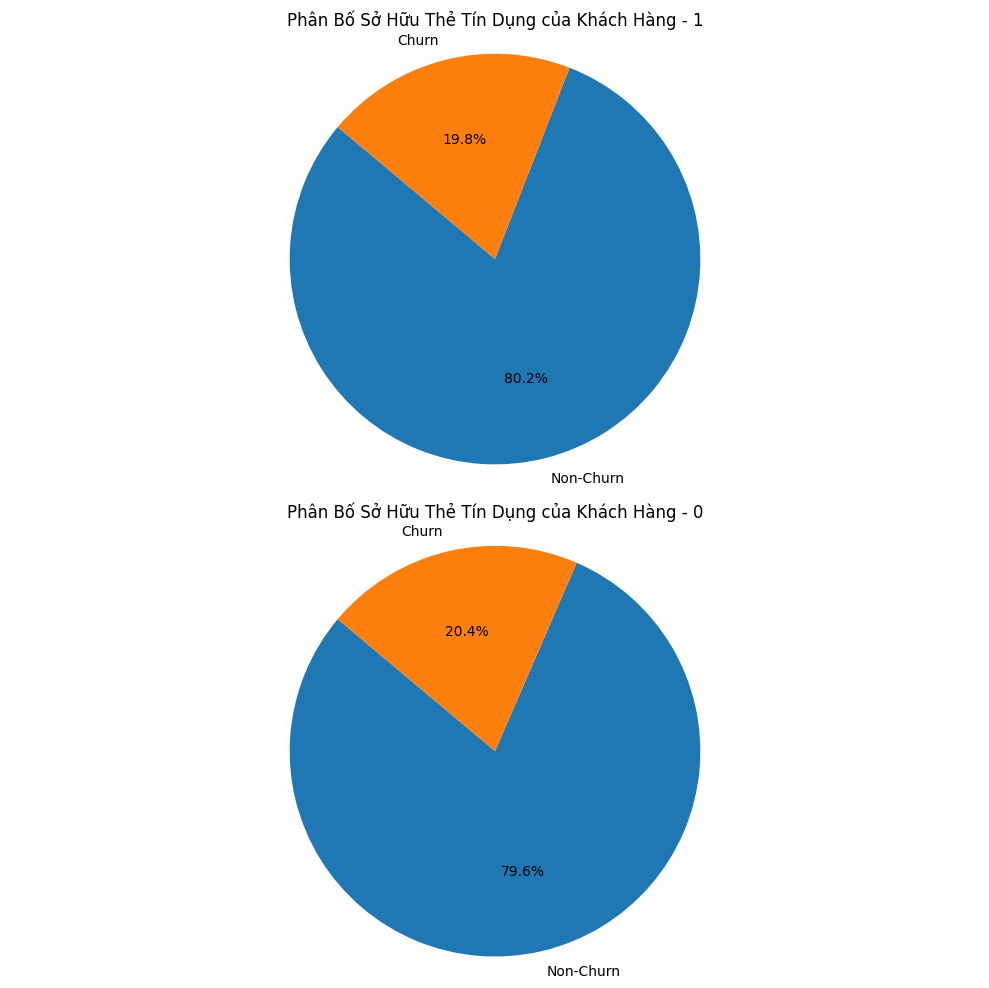

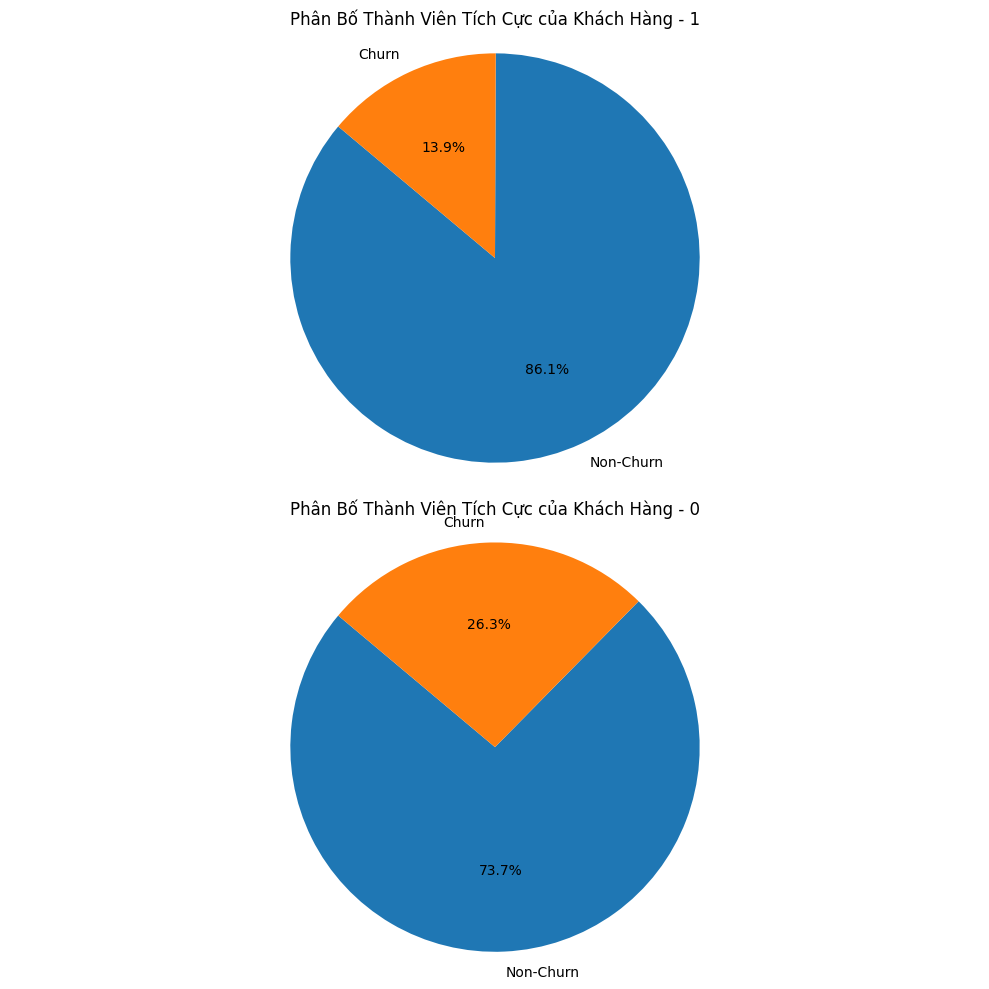

In [ ]:
import matplotlib.pyplot as plt

# Hàm tạo biểu đồ tròn cho mỗi giá trị duy nhất trong một cột, hiển thị churn và non-churn
def pie_chart_split(data, column, title):
    unique_values = data[column].unique()
    fig, axes = plt.subplots(len(unique_values), 1, figsize=(10, 5 * len(unique_values)))

    for i, value in enumerate(unique_values):
        sub_data = data[data[column] == value]['churn'].value_counts()
        axes[i].pie(sub_data, labels=sub_data.index.map({0: 'Non-Churn', 1: 'Churn'}), autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{title} - {value}')
        axes[i].axis('equal')  # Đảm bảo biểu đồ tròn là hình tròn.

    plt.tight_layout()
    plt.show()

# Biểu đồ tròn phân biệt churn và non-churn cho từng giá trị duy nhất trong các cột

# Phân Bố Quốc Gia với churn và non-churn
pie_chart_split(data, 'country', 'Phân Bố Quốc Gia của Khách Hàng')

# Phân Bố Số Lượng Sản Phẩm với churn và non-churn
pie_chart_split(data, 'products_number', 'Phân Bố Số Lượng Sản Phẩm của Khách Hàng')

# Phân Bố Sở Hữu Thẻ Tín Dụng với churn và non-churn
pie_chart_split(data, 'credit_card', 'Phân Bố Sở Hữu Thẻ Tín Dụng của Khách Hàng')

# Phân Bố Thành Viên Tích Cực với churn và non-churn
pie_chart_split(data, 'active_member', 'Phân Bố Thành Viên Tích Cực của Khách Hàng')


Comparison of Additional Parameters Between Churned and Non-Churned:
 churn                  0           1
credit_score  651.480113  646.123780
age            36.629202   44.498716
tenure          5.035668    4.918336


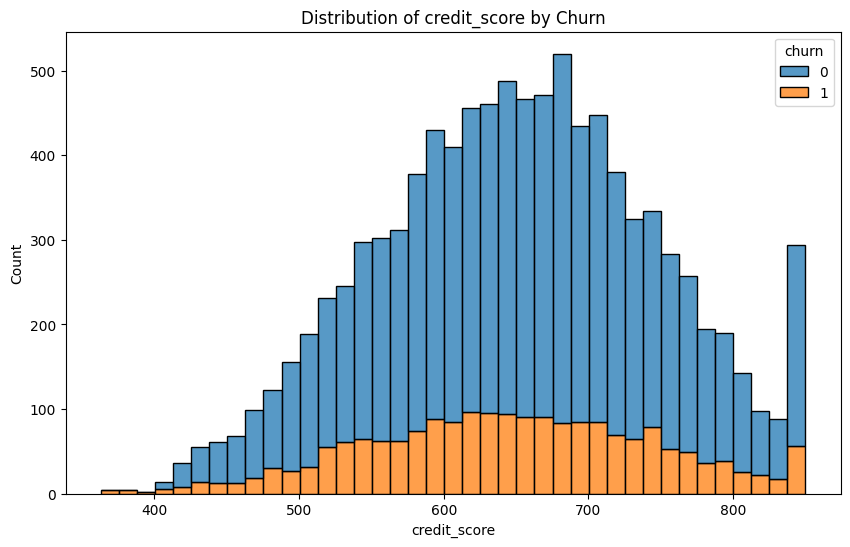

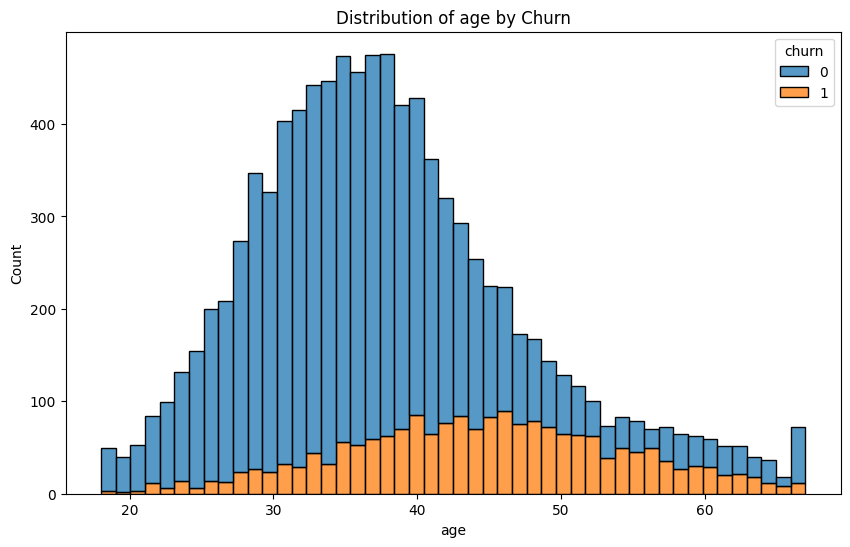

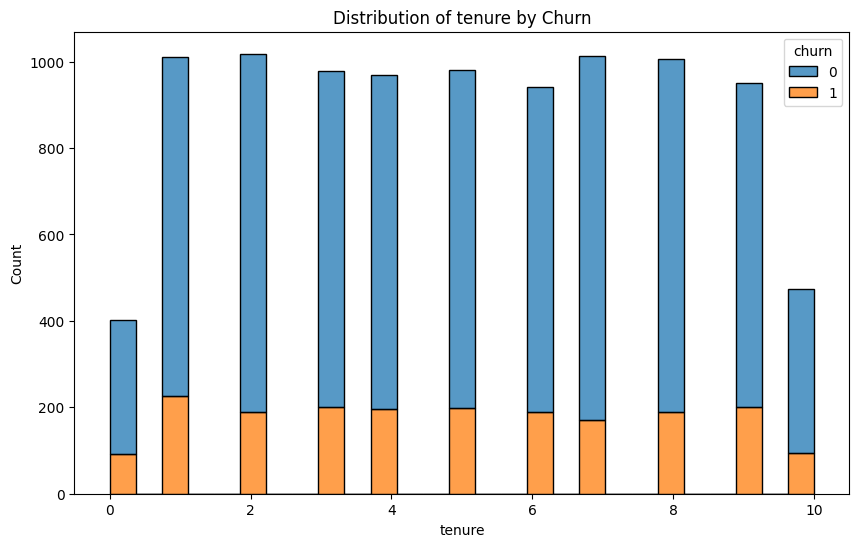

In [ ]:
# Hypothesis 2: Additional Parameters
additional_columns = ['credit_score', 'age', 'tenure']
additional_comparison = data.groupby('churn')[additional_columns].mean().T
print("Comparison of Additional Parameters Between Churned and Non-Churned:\n", additional_comparison)

# Visualize Additional Parameters
for col in additional_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, hue='churn', multiple='stack')
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

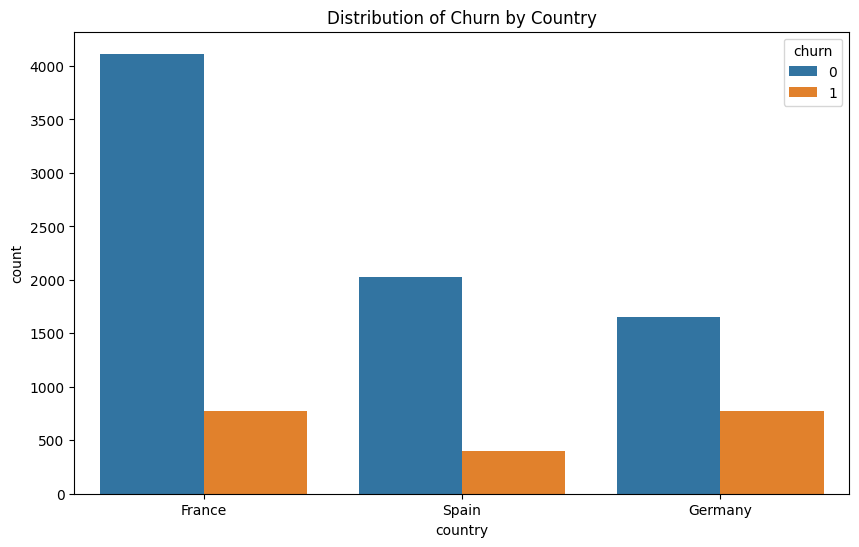

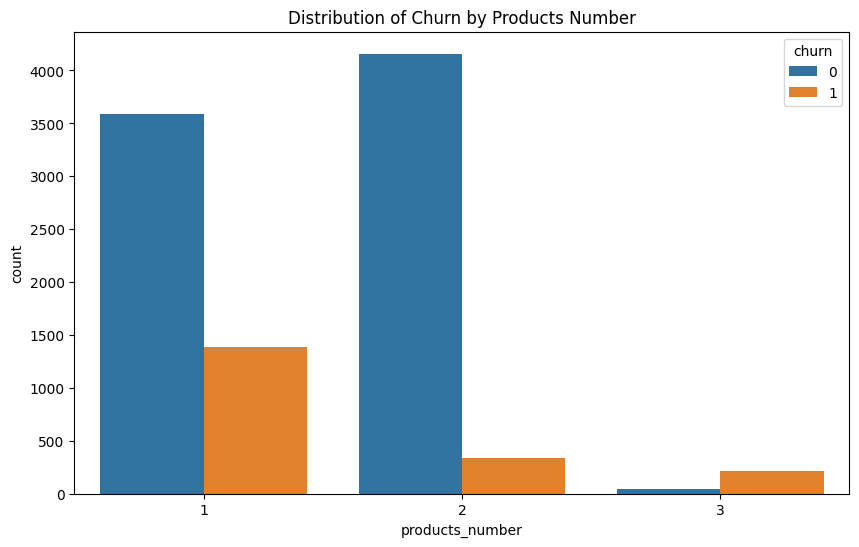

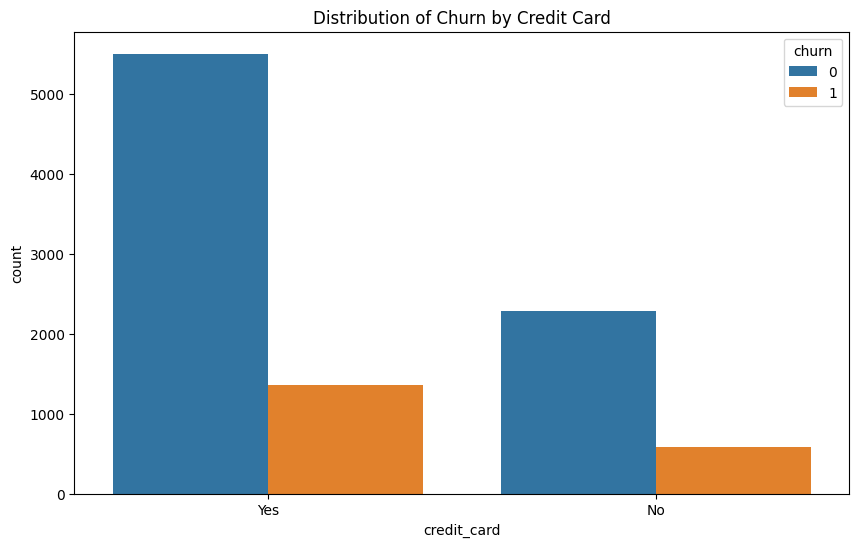

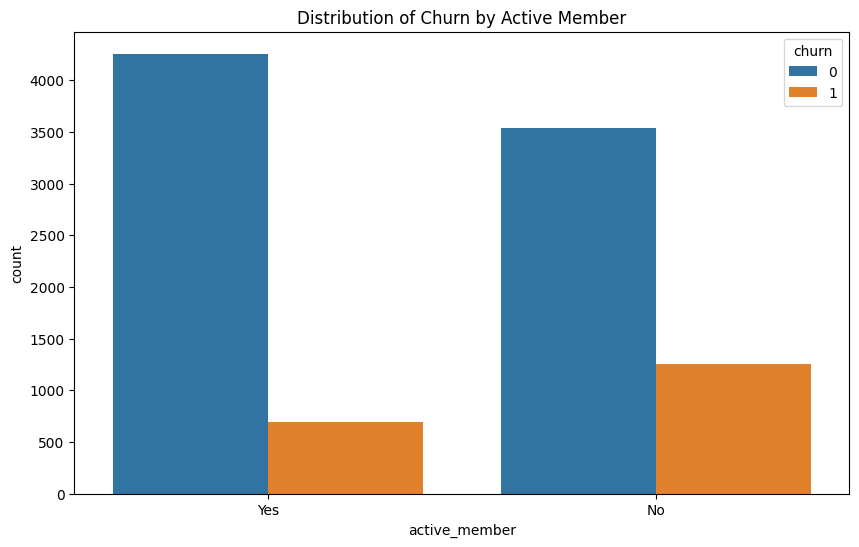

In [ ]:
# Correcting the visualization code to show country names and descriptive labels for credit card and active member

# Mapping integers back to country names for the visualization
data['country'] = data['country'].map({0: 'France', 1: 'Spain', 2: 'Germany'})

# Mapping binary variables to yes/no for the visualization
data['credit_card'] = data['credit_card'].map({1: 'Yes', 0: 'No'})
data['active_member'] = data['active_member'].map({1: 'Yes', 0: 'No'})

# Visualize the distribution of churn with respect to categorical variables

# Distribution of Churn by Country
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='churn', data=data)
plt.title('Distribution of Churn by Country')
plt.show()

# Distribution of Churn by Products Number
plt.figure(figsize=(10, 6))
sns.countplot(x='products_number', hue='churn', data=data)
plt.title('Distribution of Churn by Products Number')
plt.show()

# Distribution of Churn by Credit Card
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', hue='churn', data=data)
plt.title('Distribution of Churn by Credit Card')
plt.show()

# Distribution of Churn by Active Member
plt.figure(figsize=(10, 6))
sns.countplot(x='active_member', hue='churn', data=data)
plt.title('Distribution of Churn by Active Member')
plt.show()


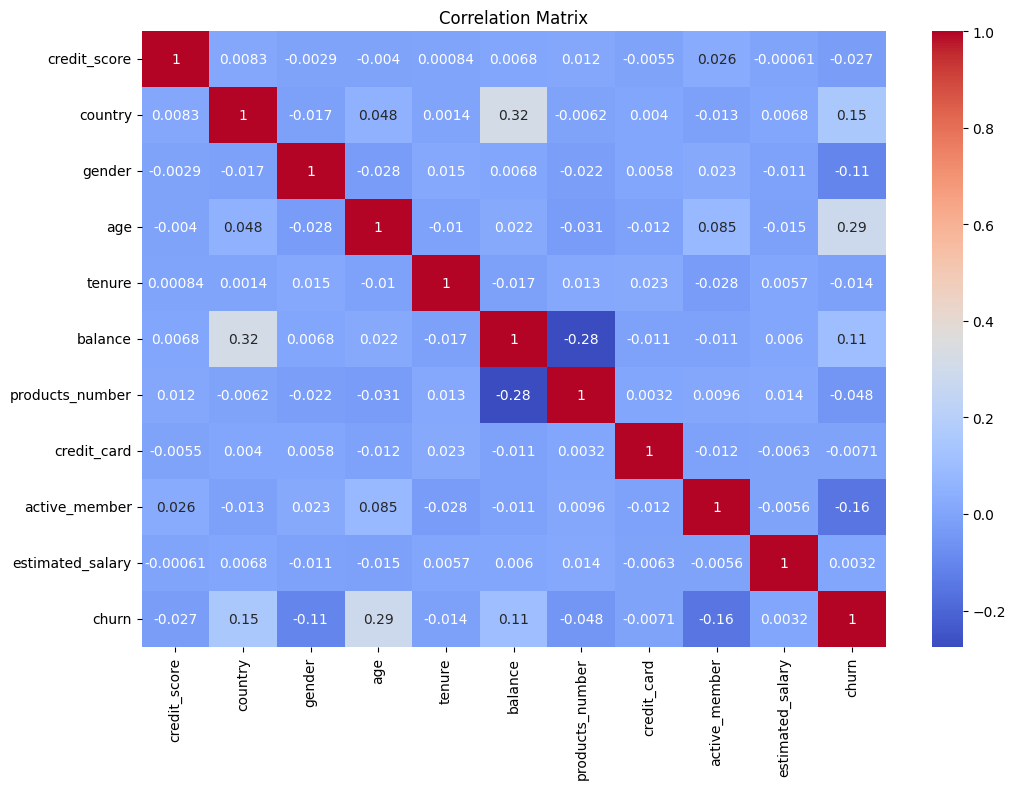

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

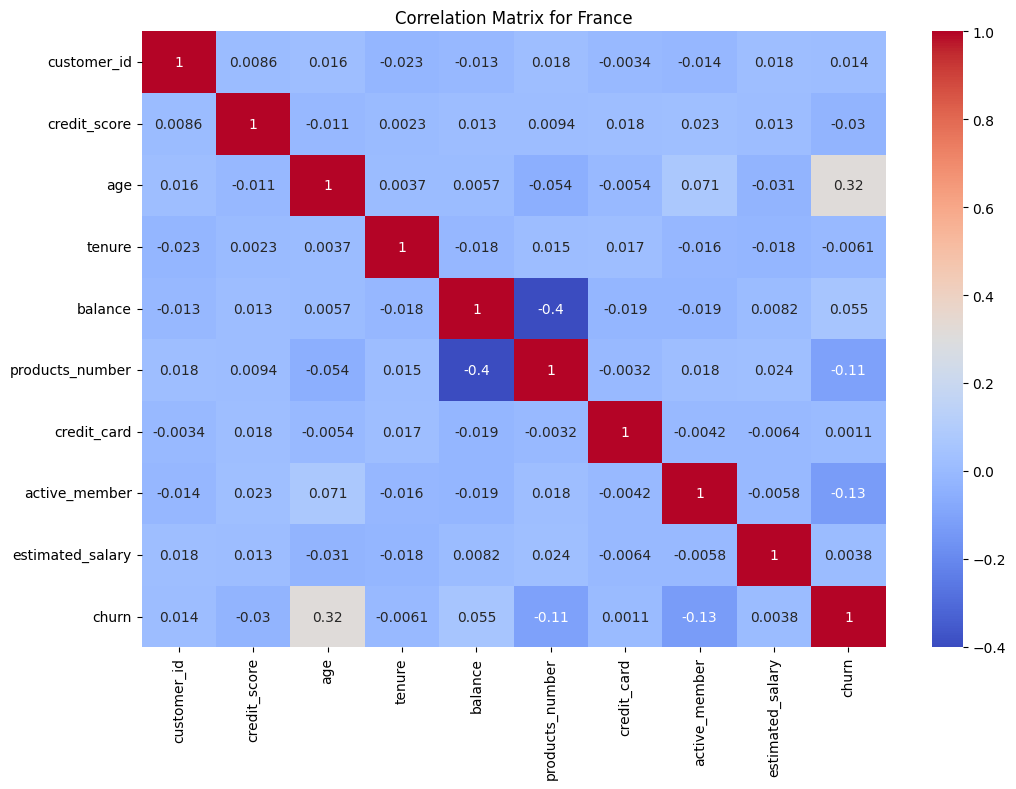

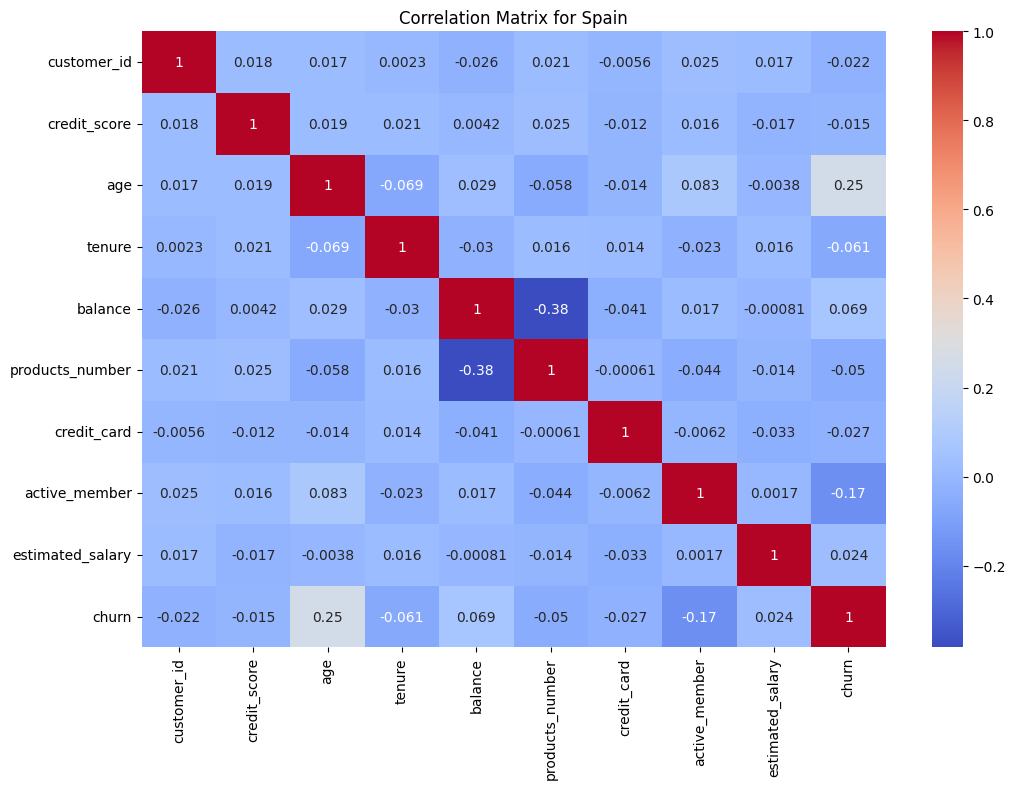

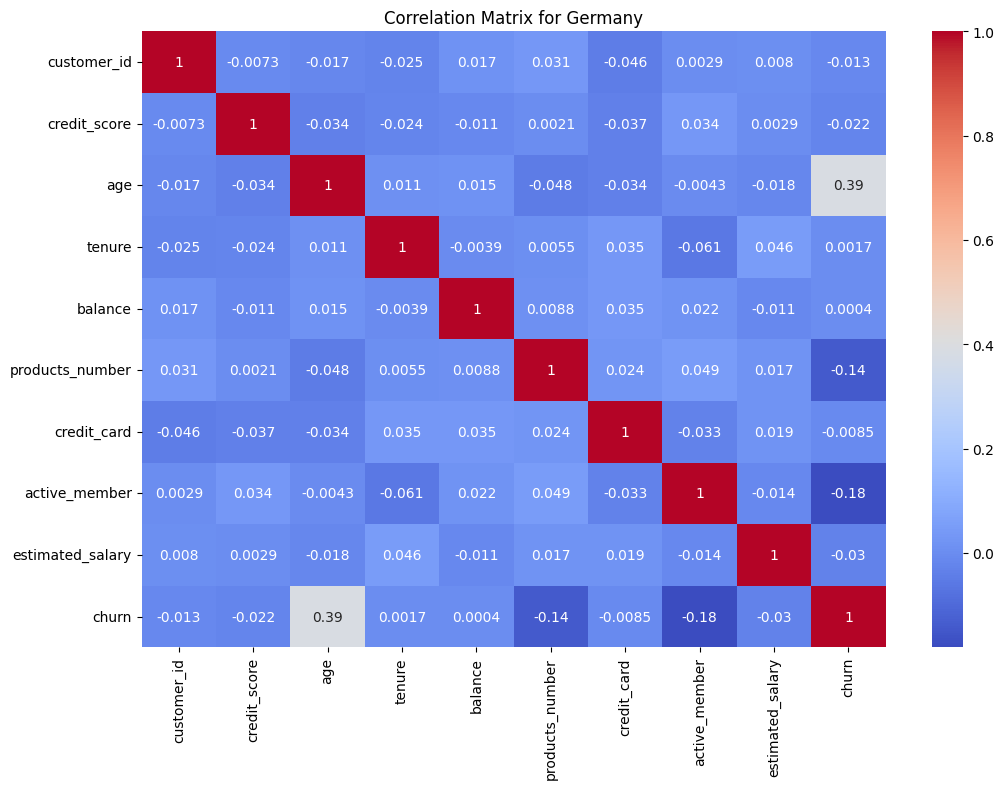

In [ ]:
# Define the country names mapping
country_names = {0: 'France', 1: 'Spain', 2: 'Germany'}

# Generate a correlation matrix for each country
for country_code, country_name in country_names.items():
    # Filter data for the specific country
    country_data = data[data['country'] == country_code]

    # Exclude 'country' and 'gender' from the correlation matrix
    corr_data = country_data.drop(columns=['country', 'gender'])

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {country_name}')
    plt.show()


# ***Training model***

In [ ]:
# Loại bỏ 'customer_id' vì nó không phải là một đặc điểm và tách đặc điểm và mục tiêu
X = data.drop('churn', axis=1)
y = data['churn']

# Định nghĩa các đặc điểm số và đặc điểm danh mục
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender']

# Pipeline tiền xử lý cho các đặc điểm số
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Pipeline tiền xử lý cho các đặc điểm danh mục
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Kết hợp các bước tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Từ điển chứa các mô hình và các chỉ số đánh giá hiệu suất của chúng
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hàm để đánh giá một mô hình
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Đánh giá từng mô hình
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    accuracy, report = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
    results[model_name] = {'accuracy': accuracy, 'report': report}

# Hiển thị kết quả
for model_name, metrics in results.items():
    print(f"Mô hình: {model_name}")
    print(f"Độ chính xác: {metrics['accuracy']}")
    print(f"Báo cáo phân loại:\n{metrics['report']}\n")

# Tinh chỉnh siêu tham số cho Random Forest và Gradient Boosting bằng GridSearchCV

# Định nghĩa các lưới tham số
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Tạo pipelines cho các mô hình
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier(random_state=42))])

# GridSearchCV cho Random Forest
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# GridSearchCV cho Gradient Boosting
grid_search_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Các tham số và điểm số tốt nhất
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_params_rf, best_score_rf, best_params_gb, best_score_gb


Mô hình: Logistic Regression
Độ chính xác: 0.803
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.50      0.14      0.22       393

    accuracy                           0.80      2000
   macro avg       0.66      0.55      0.55      2000
weighted avg       0.76      0.80      0.76      2000


Mô hình: Decision Tree
Độ chính xác: 0.7985
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1607
           1       0.49      0.49      0.49       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000


Mô hình: Random Forest
Độ chính xác: 0.8595
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.47      0.

({'classifier__max_depth': 10,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 5,
  'classifier__n_estimators': 100},
 0.854499151597048,
 {'classifier__learning_rate': 0.1,
  'classifier__max_depth': 3,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 10,
  'classifier__n_estimators': 50,
  'classifier__subsample': 0.8},
 0.8532491671849346)